In [2]:
# %%
import re
tokenizer = nltk.RegexpTokenizer(r"[A-Za-z]\w+")
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:

# %%
data = pd.read_csv('Suicide_Detection.csv',encoding='ISO-8859-1',on_bad_lines='skip')
data.head()

C:\Users\Aashna\AppData\Local\Temp\ipykernel_16780\871399509.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Suicide_Detection.csv',encoding='ISO-8859-1',on_bad_lines='skip')


,ï»¿,text,class,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Am I weird I don't get affected by compliments...,non-suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,i need helpjust help me im crying so hard,suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,"IÃ¢â¬â¢m so lostHello, my name is Adam (16) ...",suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

# %%
data = data.iloc[:, 1:3]
data.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"IÃ¢â¬â¢m so lostHello, my name is Adam (16) ...",suicide


In [5]:

# %%
data['class'].value_counts()

class
suicide                                                                                                                                                                                                                                                                                                                                                       116033
non-suicide                                                                                                                                                                                                                                                                                                                                                   116012
  which  is  in  thewilderness.7And they returned                                                                                                                                                                                                                                       

In [6]:

# %%
data = data[data['class'].apply(lambda x: x=="suicide" or x=="non-suicide")]

# %%
data['class'].value_counts()

class
suicide        116033
non-suicide    116012
Name: count, dtype: int64

In [7]:

# %%
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232031 entries, 0 to 233336
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232031 non-null  object
 1   class   232031 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


In [8]:

# %%
data['class'] = data['class'].replace('non-suicide', 0)
data['class'] = data['class'].replace('suicide', 1)

# %%
data.head()


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"IÃ¢â¬â¢m so lostHello, my name is Adam (16) ...",1


In [9]:

# %%
data = data[data['text'].apply(lambda x: len(x.split())<=170)]
data.reset_index(drop=True, inplace=True)

# %%
data['class'].value_counts()

class
0    108306
1     71000
Name: count, dtype: int64

In [10]:

# %%
df_grouped_by = data.groupby(['class'])
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced = df_balanced.droplevel(['class'])
df_balanced

,text,class
0,cool shit I did for art class [https://cdn.dis...,0
1,how in the world do people take 10-20 minute p...,0
2,Im so boreddddd ahhh \nIf you wanna talk to a ...,0
3,Play Animal Crossing (looking for friends!) IÃ...,0
4,One thing every human can agree with The winne...,0
...,...,...
70995,Does anyone else hate it when people randomly ...,1
70996,(question) HOW BAD YOU FEEL WHEN YOU SEE SOMEO...,1
70997,WhatÃ¢â¬â¢s the best thing to say in a suici...,1
70998,Every road is the same.This is hard for me I n...,1


In [ ]:
# %%
pip install imbalanced-learn

In [11]:

# %%
from collections import Counter

In [12]:

# %%
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

x,y = over_sampler.fit_resample(data['text'].values.reshape(-1,1), data['class'])
print(f"Training target statistics: {Counter(y)}")

Training target statistics: Counter({1: 108306, 0: 108306})


In [13]:

# %%
x[:5]

array([["Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen."],
       ["Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it"],
       ['Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again. I swear to fucking God

In [14]:

# %%
x = x.flatten()
x.shape

(216612,)

In [ ]:
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")

nltk.download('omw-1.4')
nltk.download('wordnet')

In [ ]:
for i in range(0,216612):
    tokens = tokenizer.tokenize(x[i])
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    token_update = [word for word in lemmatized_tokens if not word in stopwords.words()]
    x[i] = (" ").join(token_update)
    # if i%500 == 0:
      # print(i," ",x[i])

In [ ]:
temp_x = x
temp_y = y

y.tolist()
x.tolist()

In [ ]:
data = pd.DataFrame([x,y]).transpose()
data.columns = ['text', 'label']
data.to_csv('clean_textual.csv')

In [17]:
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [18]:
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
from collections import Counter
import matplotlib.pyplot as plt

In [19]:
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 0.001
SEED = 0

In [38]:
data = pd.read_csv('clean_textual.csv')
data = data.dropna()
data.head()

,Unnamed: 0,text,label
0,0,wife threatening suiciderecently left wife che...,1
1,1,weird affected compliment coming irl feel inte...,0
2,2,finally hear year swear fucking god annoying,0
3,3,helpjust cry hard,1
4,4,tonight canã anymore quit,1


In [39]:
data = data.iloc[:, 1:3]
data.head()

,text,label
0,wife threatening suiciderecently left wife che...,1
1,weird affected compliment coming irl feel inte...,0
2,finally hear year swear fucking god annoying,0
3,helpjust cry hard,1
4,tonight canã anymore quit,1


In [40]:
data['label'].value_counts()

label
1    108205
0    108139
Name: count, dtype: int64

In [41]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['text'], data['label'],
                                                                    random_state=SEED,
                                                                    test_size=0.6,
                                                                    stratify=data['label'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=SEED,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

data.text=data.text.astype(str)

In [42]:
train_text

8954                    gay happyi guess extremely straight
200993    realized crazy retard clue act retarded guess ...
45655     feel chemical imbalance brain making dysfuncti...
4035      mental hospital hasnã helped suicide attempt j...
206240    future lifehi everyoneã aspect future life fut...
                                ...                        
189453    year gonna kill guy teenager heã gonna drown s...
140547    understand feeling alli live anymore doe make ...
182377                                 kill meim damn tired
37212     half brother dad commit suicidemy half brother...
48137     completely lose shiti male grew sad bitter hos...
Name: text, Length: 86537, dtype: object

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size = len(tokenizer.word_index) + 1

vocab_size

61120

In [44]:
vocab = Counter()
tokens_list = [(s.split()) for s in train_text]
for i in tokens_list:
  vocab.update(i)
min_occurance = 2
tokens = [k for k,c in vocab.items() if c >= min_occurance]
print(len(tokens))

28788


In [45]:
def save_list(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
 
save_list(vocab, 'vocab.txt')

In [46]:
def clean_line(line, vocab):
  tokens = line.split()
  tokens_clean = [w for w in tokens if w in vocab]
  return [tokens_clean]

def process_lines(data, vocab):
  lines = list()
  for i in data:
    line = clean_line(i, vocab)
    lines += line
  return lines

In [47]:
train_clean = process_lines(train_text, vocab)
test_clean = process_lines(test_text, vocab)

model = Word2Vec(vector_size=100, window=4, min_count=2, epochs=18, seed=SEED)
model.build_vocab(train_clean, progress_per=200)

In [48]:
model.train(train_clean, total_examples=model.corpus_count, epochs=EPOCHS,report_delay=1)

(7552153, 8538985)

In [49]:
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [50]:
model.wv.most_similar('suicide')

[('suicidei', 0.8089947700500488),
 ('suicideafter', 0.7604475617408752),
 ('killing', 0.7101738452911377),
 ('arson', 0.6743258237838745),
 ('tni', 0.6723685264587402),
 ('intervenes', 0.6693553328514099),
 ('suicid', 0.6662326455116272),
 ('unsuccessful', 0.6650739908218384),
 ('suicidein', 0.6507349014282227),
 ('git', 0.6217130422592163)]

In [51]:
def tokenize_and_encode(text, max_length=70):
    encoded_docs = tokenizer.texts_to_sequences(text)
    padded_sequence = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    return padded_sequence

tokens_train = tokenize_and_encode(train_text)
tokens_val = tokenize_and_encode(val_text)
tokens_test = tokenize_and_encode(test_text)

In [52]:
def load_embedding(filename):
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	embedding = dict()
	for line in lines:
		parts = line.split()
		embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
	return embedding

In [53]:
def get_weight_matrix(embedding, vocab, embedding_dim):
	vocab_size = len(vocab) + 1
	weight_matrix = np.zeros((vocab_size, embedding_dim))
	for word, i in vocab.items():
		weight_matrix[i] = embedding.get(word)
	return weight_matrix

In [54]:
def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = weights_matrix.shape[0], weights_matrix.shape[1]
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict({'weight': torch.from_numpy(weights_matrix)})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings, embedding_dim

In [55]:
raw_embedding_word2vec = load_embedding('embedding_word2vec.txt') 
embedding_vectors_word2vec = get_weight_matrix(raw_embedding_word2vec, tokenizer.word_index, 100)
embedding_vectors_word2vec = np.float32(embedding_vectors_word2vec)

In [56]:
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout,Conv1D,MaxPooling1D,Flatten
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 

CNN Model

In [57]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=70))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 100)           6112000   
                                                                 
 conv1d (Conv1D)             (None, 63, 32)            25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 32)            0         
                                                                 
 flatten (Flatten)           (None, 992)               0         
                                                                 
 dense (Dense)               (None, 10)                9930      
                                                        

Epoch 1/4
339/339 [==============================] - 52s 149ms/step - loss: 0.2913 - accuracy: 0.8750 - val_loss: 0.1985 - val_accuracy: 0.9251
Epoch 2/4
339/339 [==============================] - 47s 140ms/step - loss: 0.1513 - accuracy: 0.9451 - val_loss: 0.1863 - val_accuracy: 0.9285
Epoch 3/4
339/339 [==============================] - 48s 141ms/step - loss: 0.0996 - accuracy: 0.9659 - val_loss: 0.2007 - val_accuracy: 0.9274
Epoch 4/4
339/339 [==============================] - 48s 142ms/step - loss: 0.0659 - accuracy: 0.9774 - val_loss: 0.2383 - val_accuracy: 0.9241


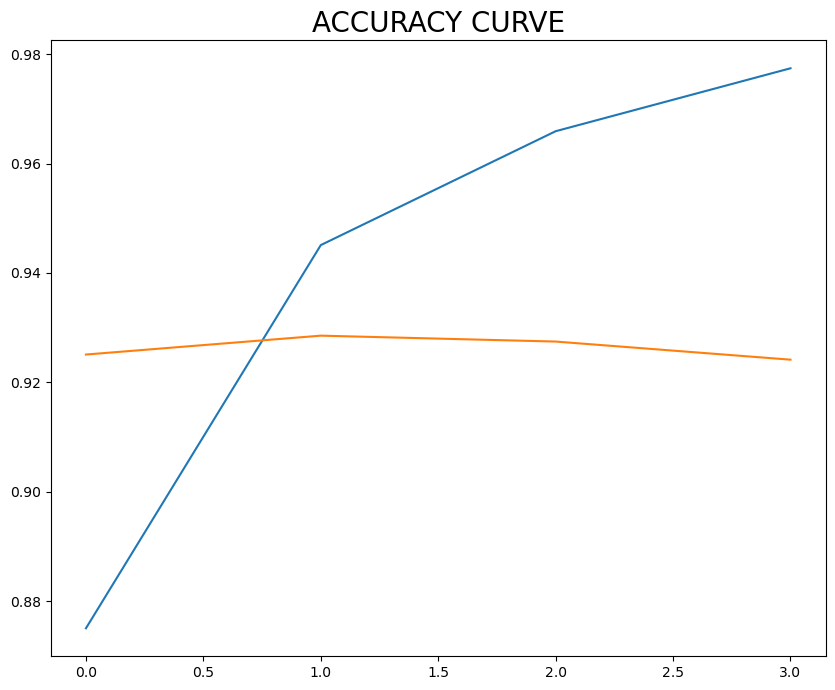

In [58]:
train=model.fit(tokens_train,train_labels,validation_data=(tokens_val,val_labels),epochs=4,batch_size=256)

plt.figure(figsize=(10,8))
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

In [59]:
test_predictions = (model.predict(tokens_test) > 0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_predictions))

2029/2029 [==============================] - 6s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     32442
           1       0.93      0.92      0.92     32462

    accuracy                           0.93     64904
   macro avg       0.93      0.93      0.93     64904
weighted avg       0.93      0.93      0.93     64904



LSTM Model

In [60]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 100, input_length=70))
model1.add(LSTM(units=100,return_sequences = True))
model1.add(Dense(10))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 100)           6112000   
                                                                 
 lstm (LSTM)                 (None, 70, 100)           80400     
                                                                 
 dense_2 (Dense)             (None, 70, 10)            1010      
                                                                 
 dense_3 (Dense)             (None, 70, 1)             11        
                                                                 
Total params: 6,193,421
Trainable params: 6,193,421
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
train=model1.fit(tokens_train,train_labels,validation_data=(tokens_val,val_labels),epochs=5,batch_size=256)

Epoch 1/5
339/339 [==============================] - 115s 332ms/step - loss: 0.3014 - accuracy: 0.8745 - val_loss: 0.2372 - val_accuracy: 0.9064
Epoch 2/5
339/339 [==============================] - 130s 384ms/step - loss: 0.1860 - accuracy: 0.9298 - val_loss: 0.2270 - val_accuracy: 0.9145
Epoch 3/5
339/339 [==============================] - 132s 389ms/step - loss: 0.1444 - accuracy: 0.9469 - val_loss: 0.2286 - val_accuracy: 0.9134
Epoch 4/5
339/339 [==============================] - 125s 370ms/step - loss: 0.1184 - accuracy: 0.9546 - val_loss: 0.2468 - val_accuracy: 0.9111
Epoch 5/5
339/339 [==============================] - 160s 473ms/step - loss: 0.1014 - accuracy: 0.9594 - val_loss: 0.2639 - val_accuracy: 0.9076


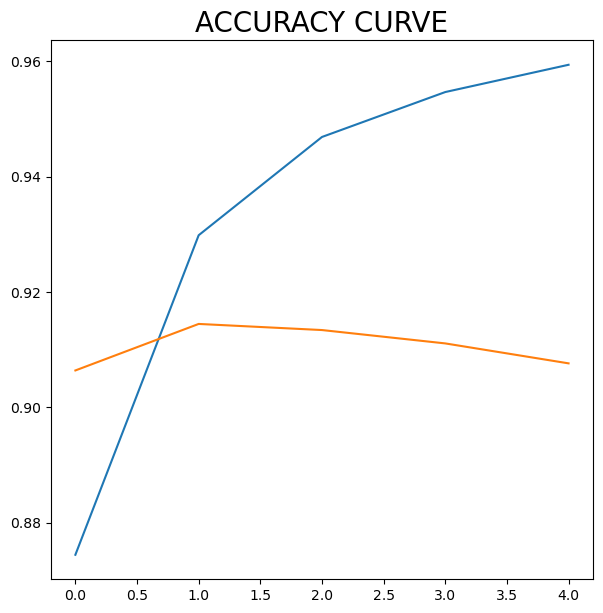

In [62]:
plt.figure(figsize=(7,7))
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

In [63]:
# %%
test_predictions = model1.predict(tokens_test)
pred = (test_predictions.sum(axis=1)/70 > 0.5).astype(int).flatten()
print(classification_report(test_labels, pred))


2029/2029 [==============================] - 69s 34ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     32442
           1       0.91      0.94      0.92     32462

    accuracy                           0.92     64904
   macro avg       0.92      0.92      0.92     64904
weighted avg       0.92      0.92      0.92     64904

